# Test

### Pacchetti

In [30]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
import pandas as pd
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import AppLayout, FloatSlider
from mpl_toolkits.mplot3d import Axes3D

### Funzioni

In [2]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

### Test

In [3]:
#definisco la dimensionaità:
# - (1,1): funzione da R in R
# - (1,2): curva in 2D (funzione da R in R^2)
# - (1,3): curva in 3D
# - (2,3): superficie in 3D
sh = Bs.shape(2,3)
sh.show()

#defiisco i knot vector
kv = Bs.knot_vector(1,5,[0,1,2,3,4,5,6])
kv.show()

#alloco la Bspline
#ATTENZIONE: devo creare un vettore di knot vector 
# di lunghezza pari alla  dimensionalità della superficie:
# [kv] per una curva
# [kv,kv] per una superficie
# è anche possibile usare knot vector diversi per "dimensioni" diverse
bs = Bs.Bspline(sh,[kv,kv])
#bs.show()

dimension   :  2
codimension :  3
polinomial degree :  1
base caridnality  :  5
knots             :  [0 1 2 3 4 5 6]


In [4]:
#cp = bs.control_points()
#print("shape: ",cp.shape)
#print("len  : ",len(cp[0]))

#bs.set_cp(0,(5.0,9.0))
#bs.show("cp")

In [5]:
bs.evaluate(  ( [5.0,2.0] , [ 5.0 ,3.0 ]  ) )

array([[0., 0., 0.],
       [0., 0., 0.]])

In [6]:
x = [ [5.0,2.0] , [5.0,2.0] , [5.0,2.0] ] #[ [1.0,4.0] , [2.0,7.0] , [5.0,4.0] , [9.0,8.0] ]
X = np.asarray(x)
print("X: ",X.size)
X.shape
X = X.reshape((int(X.size/2.0),2))
#len(X)

X:  6


# Dominio 1D

## Codominio 1D

### Funzioni di base

In [7]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=5 #base caridnality
v = [0,0,0,1,2,3,4,4,4]#np.arange(0,P+N+1)
#print(v)
kv = Bs.knot_vector(P,N,v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1.]


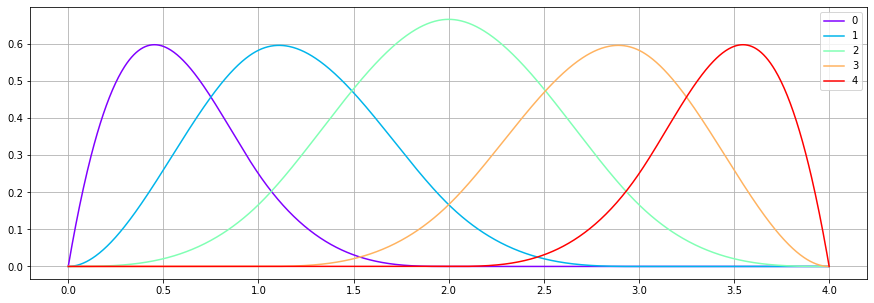

In [8]:
#grafico le funzioni di base
x = np.linspace(min(v),max(v),1000)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)
    print(bs._cp)
    
    
    y=bs.evaluate(x)
    
    plt.plot(x, y, color= next(colors),label=str(i))
    
plt.legend()
plt.grid(True)
plt.show()

#### Derivata delle funzioni di base

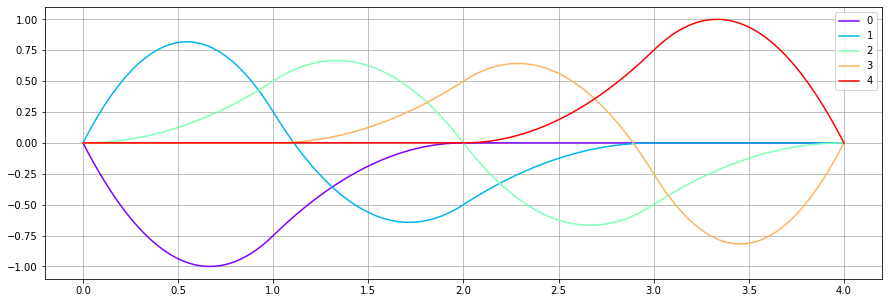

In [9]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Differenza della derivata calcola come Bpline rispetto alla derivata calcolata con gli incrementi finiti

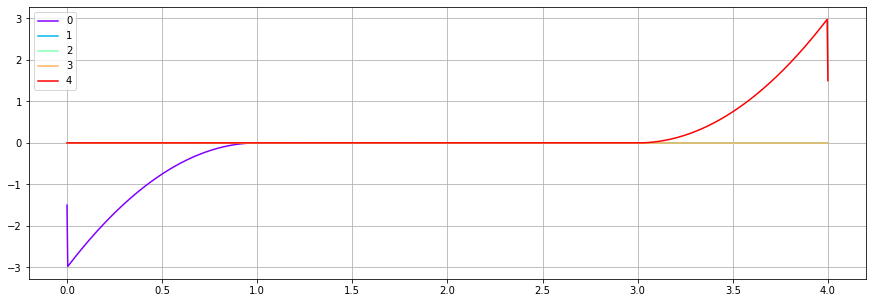

In [10]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    y_diff = derivative(f, x, dx=1e-8)
    
    c = next(colors)
    plt.plot(x, y-y_diff, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Derivata seconda delle funzioni di base

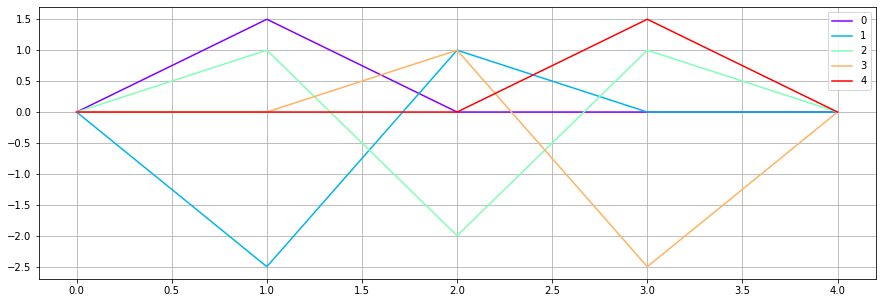

In [11]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative(2)
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Differenza della derivata seconda calcola come Bpline rispetto alla derivata calcolata con gli incrementi finiti

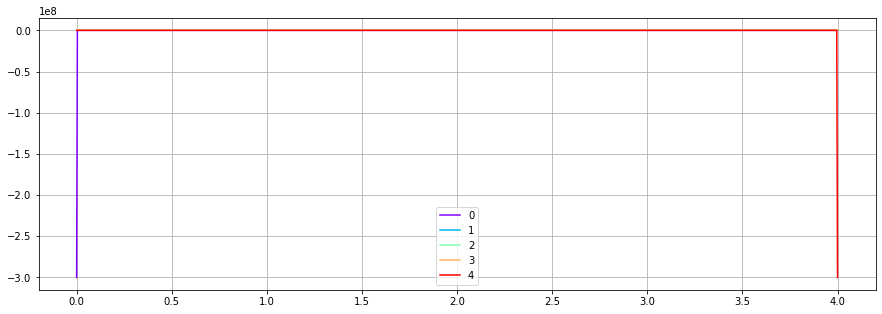

In [12]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative(2)
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    y_diff = derivative(f, x, dx=1e-8,n=2)
    
    c = next(colors)
    plt.plot(x, y-y_diff, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

### Funzioni in 1D

In [13]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=6 #base caridnality
#
xmin = 0.0
xmax = 4.0
#
v0,step = np.linspace(start=xmin       ,stop=xmax       ,num=N-1,retstep=True)
left    = np.arange  (start=xmin-step*P,stop=xmin       ,step=step)
right   = np.arange  (start=xmax       ,stop=xmax+step*P,step=step)
print(v0)
#print(left)
#print(right)
#v = [-3, -2,-1,0,1,2,3,4,5,6,7]#np.arange(0,P+N+1)
#
v = list(left) + list(v0) + list(right)
print(v)

#
kv = Bs.knot_vector(P,N,v)
#kv.show()
cp = np.random.rand(N)#[ 2.0, 1.0,  3.0 , -2.0 , 4.0 , 7.0 ]#, 1.0 , 4.0  ]

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[0. 1. 2. 3. 4.]
[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0]


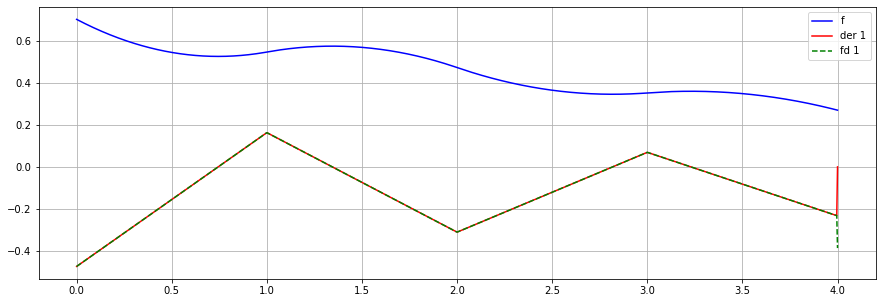

In [14]:
#grafico le funzioni di base
x = np.linspace(min(v0),max(v0),1000)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

#imposto i control points
[ bs.set_cp(i,[cp[i]]) for i in range(0,N)]

f = lambda xx : np.asarray( bs.evaluate(xx) )
    
y   = bs.evaluate(x)


der1 = bs.derivative()
der2 = bs.derivative(2)
#der3 = bs.derivative(3)

yd1  = der1.evaluate(x)
yd2  = der2.evaluate(x)
#yd3  = der3.evaluate(x)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
#order: int, optional Number of points to use, must be odd.


ydiff = derivative(f, x, dx=1e-4,n=1)
ydiff2 = derivative(f, x, dx=1e-4,n=2)
#ydiff3 = derivative(f, x, dx=1e-4,n=3,order=5)
    
plt.plot(x, y, color= "blue",label="f")

plt.plot(x, yd1, color= "red",label="der 1",linestyle="-")
plt.plot(x, ydiff, color= "green",label="fd 1",linestyle="--")

#plt.plot(x, yd2, color= "red",label="der 2",linestyle="-")
#plt.plot(x, ydiff2, color= "green",label="fd 2",linestyle="--")

#plt.plot(x, yd3, color= "red",label="der 3",linestyle="-")
#plt.plot(x, ydiff3, color= "green",label="fd 3",linestyle="--")

    
plt.legend()
plt.grid(True)
plt.show()

## Codominio 2D

### Curva in 2D

In [15]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=6 #base caridnality
#
xmin = 0.0
xmax = 5.0
v0 = [ 0,1,2,3,4,5]
v  = [-2,-1,0,1,2,3,4,5,6,7]
#
#v0,step = np.linspace(start=xmin       ,stop=xmax           ,num=N,retstep=True)
#left    = np.arange  (start=xmin-step*(P),stop=xmin           ,step=step)
#right   = np.arange  (start=xmax+step  ,stop=xmax+step*(P+1),step=step)
#print(v0)
#print(left)
#print(right)
#v = [-3, -2,-1,0,1,2,3,4,5,6,7]#np.arange(0,P+N+1)
#
#v = list(left) + list(v0) + list(right)
print(v)

#
kv = Bs.knot_vector(P,N,v)
#kv.show()
cpx = np.sort(np.random.rand(N))
cpy = np.random.rand(N)

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


In [16]:
#grafico le funzioni di base
NN = 1000
x = np.linspace(min(v0),max(v0),NN)

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

#imposto i control points
[ bs.set_cp(i,[cpx[i],cpy[i]]) for i in range(0,N)]

f = lambda xx : np.asarray( bs.evaluate(xx) )

#
y   = bs.evaluate(x)
df = pd.DataFrame(y)
df = df.rename(columns={0:"x",1:"y"})
df["x0"] = x
#df.set_index("x0",drop=False,inplace=True)

yfd = derivative(f, x, dx=1e-4,n=1)
ydfn = np.asarray([ [i,j]/(10*np.sqrt(i**2 + j**2)) for i,j in zip(yfd[:,0],yfd[:,1])])
    
der1 = bs.derivative()

#der1 = np.asarray([ [i,j]/(1e4*np.sqrt(i**2 + j**2)) for i,j in zip(der1[:,0],der1[:,1])])

In [17]:
def grafico_interattivo(N):
    
    #y   = bs.evaluate(x)
    yd1 = der1.evaluate(x[N])[0]
    yd1 = yd1/(10*np.sqrt(yd1[0]**2 + yd1[1]**2))
    #print(yd1)
    #print("(",df.loc[N,"x"],df.loc[N,"y"],") :",yd1[0],",",yd1[1])
    print("(%.2f,%.2f) : [%.2f,%.2f]" % (df.loc[N,"x"],df.loc[N,"y"],yd1[0],yd1[1]))
    #print(formatted_float)
    #print(yd1[0])
    
    plt.figure ( 0 , figsize = ( 15 , 5 ) )
   
    #converto in dataframe    
    plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.2)
    plt.scatter(cpx,cpy,color="green")
    plt.scatter(df["x"], df["y"], color= "blue",label="f",s=0.1)
    plt.quiver( [df.loc[N,"x"]] ,[df.loc[N,"y"]] , [yd1[0]] , [yd1[1]] ,\
               scale=1,scale_units="xy",color="blue",width=0.001,label="der1")
    plt.quiver( [df.loc[N,"x"]] ,[df.loc[N,"y"]] , [ydfn[N,0]] , [ydfn[N,1]] ,\
               scale=1,scale_units="xy",color="red",width=0.001,label="fd1")
    
    plt.legend()
    plt.grid(True)
    #plt.xlim(0.0,0.5)
    #plt.ylim(0.0,0.5)
    #aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
    plt.axis('equal')
    plt.show()

In [18]:
%matplotlib inline

Nw = widgets.IntSlider(value=50, min=0, max=NN ,step=1)
interactive_plot = interactive(grafico_interattivo,N=Nw)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=50, description='N', max=1000), Output()), _dom_classes=('widget-interac…

## Codominio 3D

### Curva in 3D

In [19]:
#definisco la dimensionaità:
sh = Bs.shape(1,3)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=20 #base caridnality
#
xmin = 0.0
xmax = 5.0
v0 = np.linspace(0,1,N)#[ 0,1,2,3,4,5]
v  = [-2,-1] + list(v0) + [6,7]#[-2,-1,0,1,2,3,4,5,6,7]
#
#v0,step = np.linspace(start=xmin       ,stop=xmax           ,num=N,retstep=True)
#left    = np.arange  (start=xmin-step*(P),stop=xmin           ,step=step)
#right   = np.arange  (start=xmax+step  ,stop=xmax+step*(P+1),step=step)
#print(v0)
#print(left)
#print(right)
#v = [-3, -2,-1,0,1,2,3,4,5,6,7]#np.arange(0,P+N+1)
#
#v = list(left) + list(v0) + list(right)
print(v0)
print(v)

#
kv = Bs.knot_vector(P,N,v)
#kv.show()
cpz = np.linspace(0.,1.,N)#np.random.rand(N)
cpx = np.sin(100*cpz)#np.random.rand(N)
cpy = np.cos(100*cpz)#np.random.rand(N)


#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[-2, -1, 0.0, 0.05263157894736842, 0.10526315789473684, 0.15789473684210525, 0.21052631578947367, 0.2631578947368421, 0.3157894736842105, 0.3684210526315789, 0.42105263157894735, 0.47368421052631576, 0.5263157894736842, 0.5789473684210527, 0.631578947368421, 0.6842105263157894, 0.7368421052631579, 0.7894736842105263, 0.8421052631578947, 0.894736842105263, 0.9473684210526315, 1.0, 6, 7]


In [20]:
#grafico le funzioni di base
NN = 1000
x = np.linspace(min(v0),max(v0),NN)

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

#imposto i control points
[ bs.set_cp(i,[cpx[i],cpy[i],cpz[i]]) for i in range(0,N)]

f = lambda xx : np.asarray( bs.evaluate(xx) )

#
y   = bs.evaluate(x)
df = pd.DataFrame(y)
df = df.rename(columns={0:"x",1:"y",2:"z"})
df["x0"] = x
#df.set_index("x0",drop=False,inplace=True)

yfd = derivative(f, x, dx=1e-4,n=1)
for i in yfd:
    i = i/np.sqrt(np.sum(np.square((i))))
#ydfn = np.asarray([ [i,j]/(10*np.sqrt(i**2 + j**2)) for i,j in zip(yfd[:,0],yfd[:,1])])
    
der1 = bs.derivative()

#der1 = np.asarray([ [i,j]/(1e4*np.sqrt(i**2 + j**2)) for i,j in zip(der1[:,0],der1[:,1])])

In [21]:
def grafico_interattivo(N):
    
    #y   = bs.evaluate(x)
    yd1 = der1.evaluate(x[N])[0]
    yd1 = 5*yd1/(np.sqrt(yd1[0]**2 + yd1[1]**2))
    #print(yd1)
    #print("(",df.loc[N,"x"],df.loc[N,"y"],") :",yd1[0],",",yd1[1])
    print("(%.2f,%.2f,%.2f) : [%.2f,%.2f,%.2f]" % (df.loc[N,"x"],df.loc[N,"y"],df.loc[N,"z"],\
                                         yd1[0],yd1[1],yd1[2]))
    #print(formatted_float)
    #print(yd1[0])
    
    fig = plt.figure ( 0 , figsize=(8,8) )    
    ax = fig.gca(projection='3d')
    #ax.set_aspect('equal')
    #plt.plot(pyx, pyy, pyz)
   
    #converto in dataframe    
    X = [df.loc[N,"x"] ,df.loc[N,"y"] , df.loc[N,"z"]]
    ax.plot(cpx,cpy,cpz,color="green",label="cp",linestyle="--",alpha=0.2)
    ax.scatter(cpx,cpy,cpz,color="green",marker='o')
    ax.scatter(df["x"], df["y"],df["z"], color= "blue",label="f",s=0.5)
    plt.quiver( *X , [yd1[0]] , [yd1[1]] , [yd1[2]]  , \
               length=0.1, normalize=False,label="der1",color="red")
    #plt.quiver( [X , [ydfn[N,0]] , [ydfn[N,1] ,[ydfn[N,2]] ,\
    #           scale=1,scale_units="xy",color="red",width=0.001,label="fd1")
    
    plt.legend()
    plt.grid(True)
    #plt.xlim(0.0,0.5)
    #plt.ylim(0.0,0.5)
    #aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
    #plt.axis('equal')
    set_axes_equal(ax)
    #ax.set_aspect('equal')
    plt.show()

In [22]:
%matplotlib inline
#%matplotlib interactive

Nw = widgets.IntSlider(value=100, min=0, max=NN ,step=1)
interactive_plot = interactive(grafico_interattivo,N=Nw)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=100, description='N', max=1000), Output()), _dom_classes=('widget-intera…

# Dominio 2D

## Codominio 1D

### Funzioni di base in 2D

In [23]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N0 = 3
N = 5  #base caridnality
#
xmin = 0.0
xmax = 2.0
v0 = np.linspace(xmin, xmax, N0)  #[ 0,1,2,3,4,5]
left = [0]#[-2, -1]
right = [2]#[6, 7]
v = list(left) + list(v0) + list(right)  #[-2,-1,0,1,2,3,4,5,6,7]
N = len(v) - P - 1

#
ll = len(left)
lr = len(right)
lv = len(v0)
L  = 0#ll
R  = N#ll+N#ll + lv
NP = N#R-L

#
print("v0 :", v0)
print("v  :", v)
print("N  :", N)
print("L  :", L)
print("R  :", R)

#
kv = Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

v0 : [0. 1. 2.]
v  : [0, 0.0, 1.0, 2.0, 2]
N  : 3
L  : 0
R  : 3


In [24]:
#grafico le funzioni di base
Nx = 20
Ny = 20
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

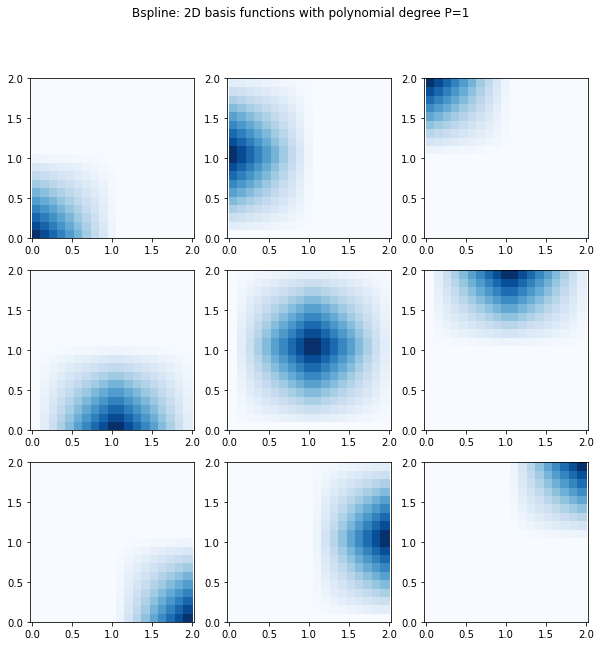

In [25]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

k=1
for i in range(L,R):
    for j in range(L,R):
        #print(k)
        ax = fig.add_subplot(NP, NP, k)#, projection='3d')
        k=k+1
        
        #
        bs.clear_cp()
        bs.set_cp([i,j],1.0)
        #
        z=bs.evaluate(XY) 
        Z=z.reshape(Nx,Ny)
        #        
        ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
        plt.axis('equal')
        #ax.set_zlim(0,1.2)
        #set_axes_equal(ax)
    
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [26]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N0 = 3
N = 5  #base caridnality
#
xmin = 0.0
xmax = 2.0
v0 = np.linspace(xmin, xmax, N0)  #[ 0,1,2,3,4,5]
left = [0]#[-2, -1]
right = [2]#[6, 7]
v = list(left) + list(v0) + list(right)  #[-2,-1,0,1,2,3,4,5,6,7]
N = len(v) - P - 1

#
ll = len(left)
lr = len(right)
lv = len(v0)
L  = 0#ll
R  = N#ll+N#ll + lv
NP = N#R-L

#
print("v0 :", v0)
print("v  :", v)
print("N  :", N)
print("L  :", L)
print("R  :", R)

#
kv = Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

v0 : [0. 1. 2.]
v  : [0, 0.0, 1.0, 2.0, 2]
N  : 3
L  : 0
R  : 3


In [27]:
#grafico le funzioni di base
Nx = 20
Ny = 20
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

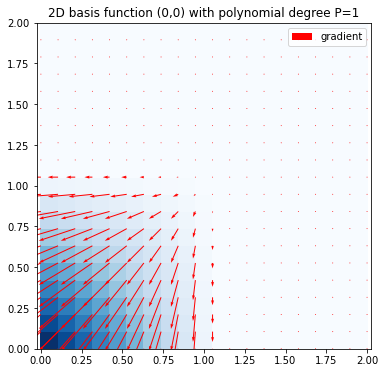

In [60]:
#%matplotlib widget
i = 0
j = 0

fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )

#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)



k=1

#print(k)
#ax = fig.add_subplot(NP, NP, k)#, projection='3d')
#k=k+1

#
bs.clear_cp()
bs.set_cp([i,j],1.0)
#
z=bs.evaluate(XY) 
Z=z.reshape(Nx,Ny)
#        
#der = bs.derivative()
#zd  = der.evaluate(XY)

#nunpy
g = np.gradient(Z)

#
plt.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
plt.quiver(X,Y,g[0],g[1],color="red",label="gradient")
plt.axis('equal')
plt.legend()
plt.title("2D basis function (%d,%d) with polynomial degree P=%d" %(i,j,P) )
plt.show()

In [34]:
f = lambda xx : np.asarray( bs.evaluate(xx) )
yfd = derivative(f, XY, dx=1e-4,n=1)

In [46]:
z=bs.evaluate(XY) 
Z=z.reshape(Nx,Ny)
g = np.gradient(Z)

(20, 20)

In [ ]:
self = bs

In [ ]:
der_sh = self._sh  
der_kv = list()
self.dim()

In [ ]:
der_sh = Bs.shape(self.dim(),self.dim())  
der_kv = list()
# questo è da sistemare
for k in range(0,self.dim()):
    kv     = self._kv[k]
    kt     = kv.knots()
    p      = kv.p()
    # questo è da sistemare
    der_kv.append(Bs.knot_vector(kv.p()-1,kv.n()-1,kt[1:-1])) # for i in self._kv]                

#der    = Bs.Bspline(der_sh,der_kv)

# array di derivate (x,y,z,...)
der = np.zeros(self.codim(),dtype=object)
for k in range(0,self.codim()):
    der[k] = Bs.Bspline(der_sh,der_kv)

In [ ]:
for i in range(0,kv.n()-1):
    #print("i:",i)
    #print("self.get_cp(i+1):",self.get_cp(i+1))
    #print("self.get_cp(i)  :",self.get_cp(i))
    #print("kt[i+2]         :",kt [i+2])
    #print("kt[i+1]         :",kt[i+1])
    cp = p*(self.get_cp(i+1) - self.get_cp(i)) / ( kt[i+p+1] - kt[i+1] ) 
    print(cp)
    #for k in range(0,self.codim()):
        #der[k].set_cp(i,[cp[k]]) 

In [ ]:
self._cp[:,0]

In [ ]:
self._cp

# Dominio 3D

## Codominio 1D

### Funzioni di base

In [3]:
#definisco la dimensionaità:
sh = Bs.shape(3, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N0 = 3
N = 5  #base caridnality
#
xmin = 0.0
xmax = 2.0
v0 = np.linspace(xmin, xmax, N0)  #[ 0,1,2,3,4,5]
left = [0]#[-2, -1]
right = [2]#[6, 7]
v = list(left) + list(v0) + list(right)  #[-2,-1,0,1,2,3,4,5,6,7]
N = len(v) - P - 1

#
ll = len(left)
lr = len(right)
lv = len(v0)
L  = 0#ll
R  = N#ll+N#ll + lv
NP = N#R-L

#
print("v0 :", v0)
print("v  :", v)
print("N  :", N)
print("L  :", L)
print("R  :", R)

#
kv = Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv,kv])
#bs.show()

v0 : [0. 1. 2.]
v  : [0, 0.0, 1.0, 2.0, 2]
N  : 3
L  : 0
R  : 3


In [4]:
#grafico le funzioni di base
Nx = 10
Ny = 10
Nz = 10
Nxyz  = Nx*Ny*Nz
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
z = np.linspace(min(v),max(v),Nz,endpoint=True)
X, Y , Z = np.meshgrid(x, y, z)
XYZ = np.zeros((Nxyz,3))
XYZ[:,0] = X.reshape((Nxyz,))
XYZ[:,1] = Y.reshape((Nxyz,))
XYZ[:,2] = Z.reshape((Nxyz,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

In [7]:
#
i = 2 
j = 2 
w = 2 
#
bs.clear_cp()
bs.set_cp([i,j,w],1.0)
#
z=bs.evaluate(XYZ) 

In [37]:
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 2D basis functions (%d,%d,%d) with polynomial degree P=" % (i,j,w,P))

#
ax = fig.add_subplot(111, projection='3d')
#
# inverto i colori, quindi quelli meno presenti sono più scuri e quindi più visibili
cmap = plt.get_cmap('viridis_r')
#normalizzo, quindi vedo tutta la gamma di coloru
norm = Normalize(vmin=min(z), vmax=max(z))
ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(z)))
#ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
#plt.axis('equal')
plt.show()

TypeError: not all arguments converted during string formatting

<Figure size 720x720 with 0 Axes>